<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


In [286]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter
import statsmodels.api as sm
import matplotlib.dates as mdates

# Lab - Séries temporais

### Responda as seguinte perguntas usando os dados Airline Passenger Numbers




In [287]:
import pandas as pd
passenger = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
passenger

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [288]:
print(f'shape dataset rows: {passenger.shape[0]} and columns: {passenger.shape[1]}')

shape dataset rows: 144 and columns: 2


*   A série é estacionária?
*   A amplitude do componente sazonal varia à medida que a tendência aumenta? Qual modelo deveria ser usado multiplicativo ou aditivo?
*   Em quais meses vende-se, em média, mais (menos) passagens aereas?
*   Agrupando os valores por meses, em algum mês observa-se um valor discrepante (outlier)?
*   Determinar o aumento (ou diminuição) percentual das vendas médias registradas em janeiro em relação a dezembro.
Dica: Calcula a diferença entre as vendas médias em janeiro e as vendas médias em dezembro, divide pelo valor das vendas médias em dezembro e multiplica por 100 .
*   Ajuste um modelo de regressão (sem considerar os dados do último ano). Faça as previsões para o seguinte ano. Calcule o Erro médio de previsão: Média entre as diferenças absolutas do valor previsto e o valor real correspondente.
*   Decompor a série em trend+saz+residuals. Qual o componente sazonal para os meses: janeiro, junho e dezembro.
*   Analise como formam decompostos (tend+saz+resid) os valores observados no último trimestre.
*   Faça um histograma dos residuals, eles seguem uma distribuição normal? Use a função shapiro da biblioteca scipy.stats para verificar a normalidade.
*   Verifique estatísticamente se os resíduos são estacionários.

In [289]:
passenger['Month'] = pd.to_datetime(passenger['Month'])


In [290]:
passenger.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

### A série é estacionária?

In [291]:
passenger

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


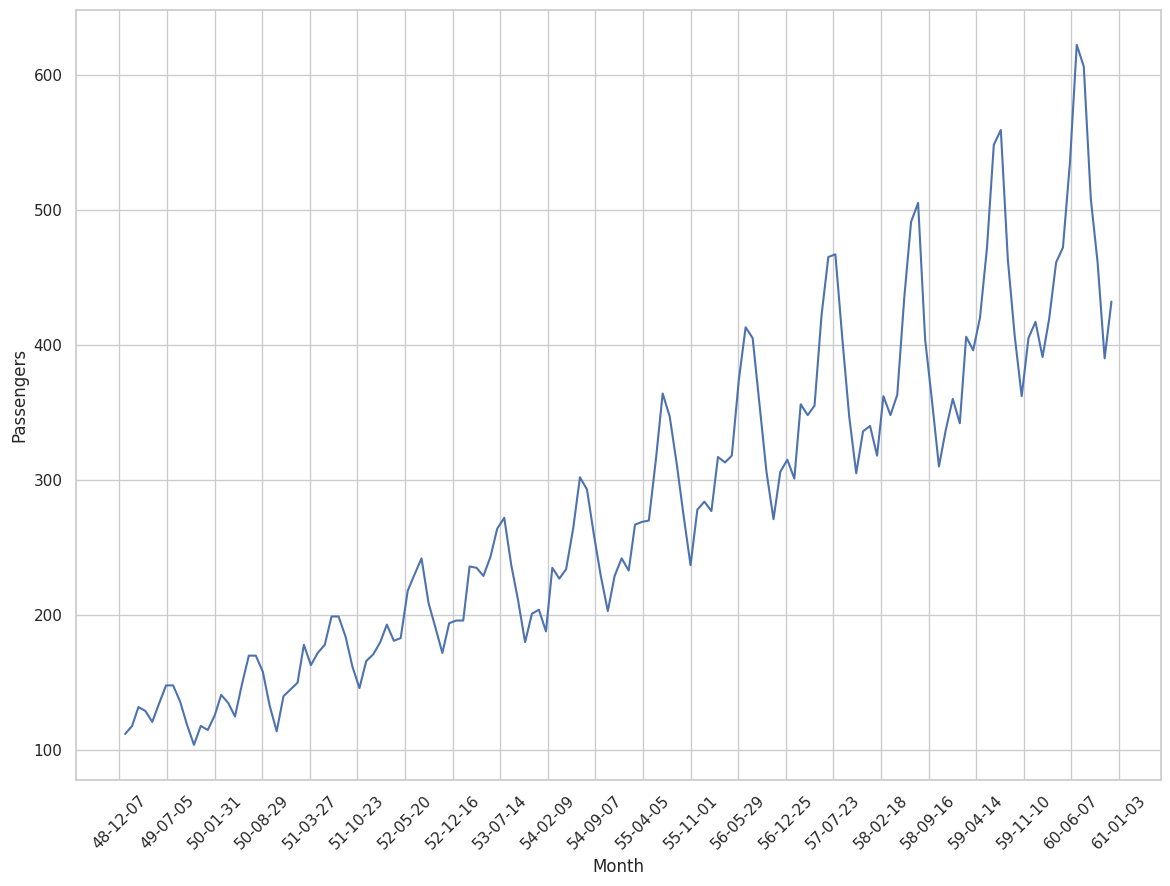

In [292]:
fig, ax = plt.subplots(figsize = (14,10))
fig = sns.lineplot(x='Month', y='Passengers', data=passenger.sort_values('Month'), ax=ax)

# Define the date format
date_form = DateFormatter("%y-%m-%d")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.WeekdayLocator(interval=30))
plt.xticks(rotation=45)
plt.show()

In [293]:
passenger = passenger.set_index('Month')

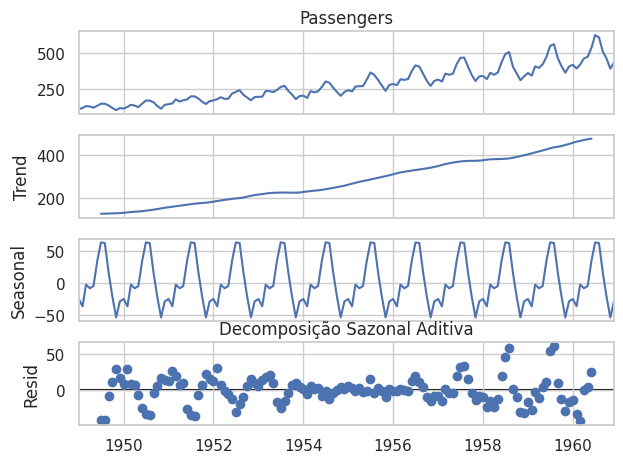

In [294]:
# Decomposição sazonal aditiva
result_aditivo = sm.tsa.seasonal_decompose(passenger['Passengers'], model='aditive')
result_aditivo.plot()
plt.title('Decomposição Sazonal Aditiva')
plt.show()

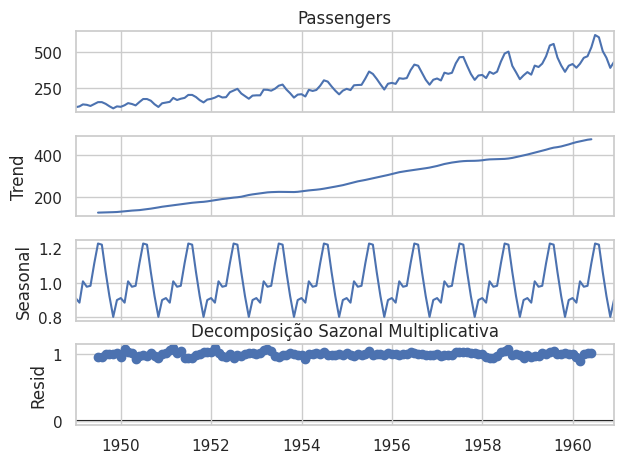

In [295]:
# Decomposição sazonal multiplicativa
result_multiplicativo = sm.tsa.seasonal_decompose(passenger['Passengers'], model='multiplicative')
result_multiplicativo.plot()
plt.title('Decomposição Sazonal Multiplicativa')
plt.show()